## This a specific attraction sales analysis on Klook website during 2016 to 2019.

In [1]:
# 1. prepare packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('F:\\BaiduNetdiskDownload\\数据分析（数据资料）\\4、KLOOK旅游数据分析\\资料2\\kelu.csv') # read the data

### 2. explore some general information. such as the shape of dataframe, how many variables, whether it contains null values, etc.

In [12]:
data.shape

(8757, 6)

In [3]:
data.head()

,author,rating,time,year,amount,frequency
0,YOUNG,60,2019/2/28,2019,110,1
1,SHING YAN,100,2019/2/28,2019,110,1
2,Sha,60,2019/2/28,2019,110,1
3,Mary Mae,100,2019/2/28,2019,110,1
4,Maria Cristina,100,2019/2/28,2019,110,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8757 entries, 0 to 8756
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author     8757 non-null   object
 1   rating     8757 non-null   int64 
 2   time       8757 non-null   object
 3   year       8757 non-null   int64 
 4   amount     8757 non-null   int64 
 5   frequency  8757 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 410.6+ KB


In [5]:
data.isnull().sum()

author       0
rating       0
time         0
year         0
amount       0
frequency    0
dtype: int64

In [6]:
data.describe()

,rating,year,amount,frequency
count,8757.000000,8757.000000,8757.0,8757.0
mean,92.417495,2017.760420,110.0,1.0
std,14.231179,0.686734,0.0,0.0
min,20.000000,2016.000000,110.0,1.0
25%,80.000000,2017.000000,110.0,1.0
50%,100.000000,2018.000000,110.0,1.0
75%,100.000000,2018.000000,110.0,1.0
max,100.000000,2019.000000,110.0,1.0


In [9]:
data.columns

Index(['author', 'rating', 'time', 'year', 'amount', 'frequency'], dtype='object')

In [11]:
data.nunique()

author       7722
rating          5
time          895
year            4
amount          1
frequency       1
dtype: int64

### With a glance, above shows that the data has 8757 entries and without any null values. It has 6 variables, but 'amount' and ' frequency' only have one value, so for further analysis, I will ignore those two variables. 'Year' shows that this data covers 4 years customer order history. However, 'time' variable was recorded as an object. In the next step, it will be transfer to Dtype datetime64.

In [15]:
data['time']=pd.to_datetime(data['time'])
data['time']

0      2019-02-28
1      2019-02-28
2      2019-02-28
3      2019-02-28
4      2019-02-28
          ...    
8752   2016-08-06
8753   2016-08-05
8754   2016-08-05
8755   2016-08-03
8756   2016-08-02
Name: time, Length: 8757, dtype: datetime64[ns]

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8757 entries, 0 to 8756
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   author     8757 non-null   object        
 1   rating     8757 non-null   int64         
 2   time       8757 non-null   datetime64[ns]
 3   year       8757 non-null   int64         
 4   amount     8757 non-null   int64         
 5   frequency  8757 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 410.6+ KB


### 3. As year and rating have 4 and 5 unique values, analyzing the data distribution on those two variables

In [21]:
data.groupby('year')['author'].count()

year
2016     277
2017    2534
2018    4956
2019     990
Name: author, dtype: int64

In [42]:
data.groupby('year')['author'].count().values

array([ 277, 2534, 4956,  990], dtype=int64)

Text(0.5, 1.0, 'Ticket sales by year')

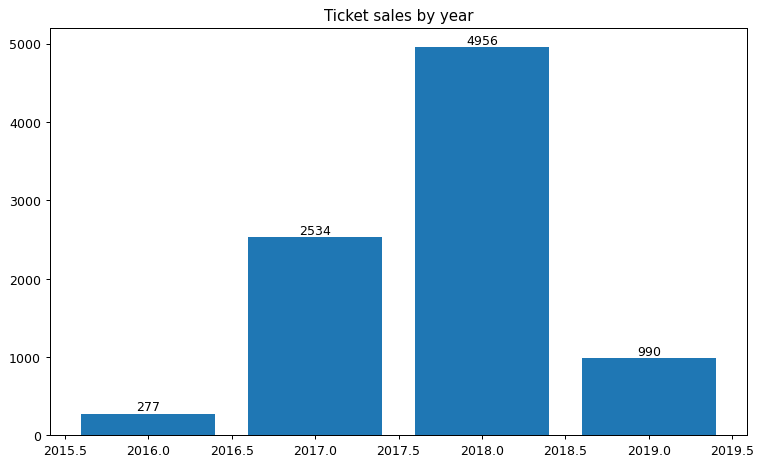

In [114]:
plt.figure(figsize=(10,6),dpi=90)
f1=plt.bar(data.groupby('year')['author'].count().index,data.groupby('year')['author'].count().values)
plt.bar_label(f1)
plt.title('Ticket sales by year')

In [107]:
data.groupby('year')['amount'].sum()

year
2016     30470
2017    278740
2018    545160
2019    108900
Name: amount, dtype: int64

Text(0.5, 1.0, 'Sales amount by year')

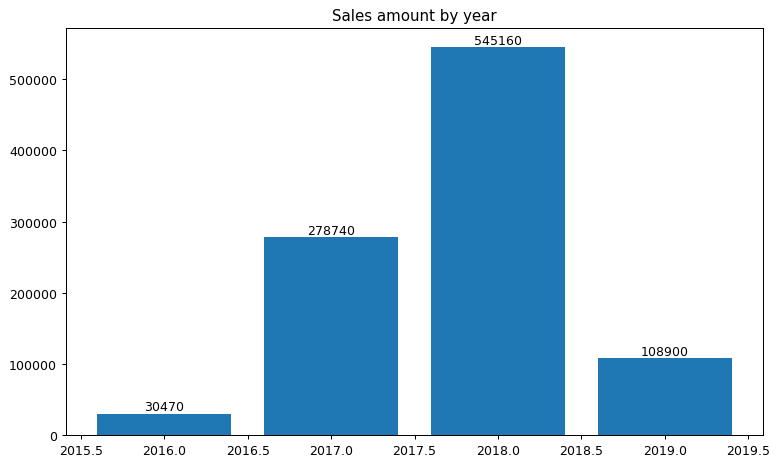

In [116]:
plt.figure(figsize=(10,6),dpi=90)
f1=plt.bar(data.groupby('year')['amount'].sum().index,data.groupby('year')['amount'].sum().values)
plt.bar_label(f1)
plt.title('Sales amount by year')

### Insight: The website experienced an significant increase from 2016-1018. The decrease trend in 2019 is due to incomplete data collection for the specific year. 

In [23]:
data.groupby('rating')['author'].count()

rating
20       69
40       90
60      502
80     1770
100    6326
Name: author, dtype: int64

<AxesSubplot:ylabel='author'>

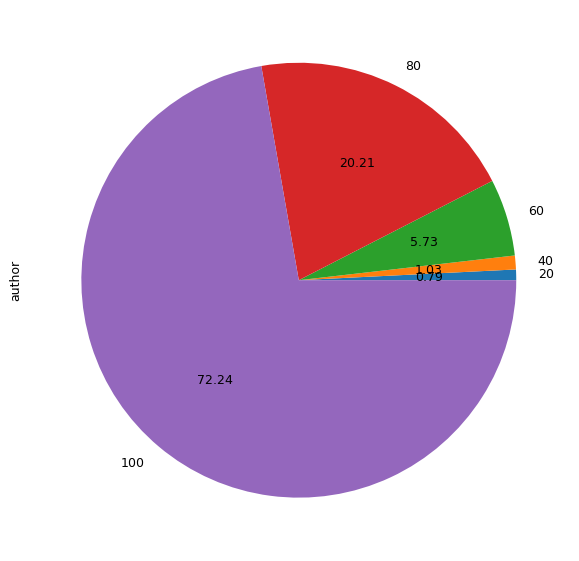

In [321]:
plt.figure(figsize=(8,8),dpi=90)
# labels=['very satisfied','some satisfied','neutral','some dissatisfied','very dissatisfied']
data.groupby('rating')['author'].count().plot(kind='pie',autopct='%.2f')


### Insight: The majority of customers were satisfied the service. The really dissatisfied uers only account less than 7 percent.

In [31]:
total_sales=data['amount'].sum()
total_booking=data['frequency'].count()
print(f'The attraction was booked {total_booking} times. Its sales on Kuloo was {total_sales} during the period')

The attraction was booked 8757 times. Its sales on Kuloo was 963270 during the period


In [55]:
loyal_customer=data.shape[0]-data['author'].nunique()
loyal_visitor_rate=loyal_customer/data.shape[0]
print(f'There were {loyal_customer} visited the attraction more than 1 time, Repeat Cumstomer Rate is {round(loyal_visitor_rate*100,2)} %')

There were 1035 visited the attraction more than 1 time, Repeat Cumstomer Rate is 11.82 %


In [56]:
data['month_year'] = pd.to_datetime(data['time']).dt.to_period('M')
data['month_year'].head()

0    2019-02
1    2019-02
2    2019-02
3    2019-02
4    2019-02
Name: month_year, dtype: period[M]

In [64]:
data['month_year'].value_counts(). sort_index()

2016-08     15
2016-09     29
2016-10     61
2016-11     64
2016-12    108
2017-01     84
2017-02     90
2017-03    116
2017-04    150
2017-05    165
2017-06    174
2017-07    205
2017-08    234
2017-09    242
2017-10    325
2017-11    365
2017-12    384
2018-01    411
2018-02    256
2018-03    311
2018-04    149
2018-05    319
2018-06    434
2018-07    481
2018-08    487
2018-09    402
2018-10    547
2018-11    557
2018-12    602
2019-01    580
2019-02    410
Freq: M, Name: month_year, dtype: int64

Text(0.5, 1.0, 'Ticket sales by month')

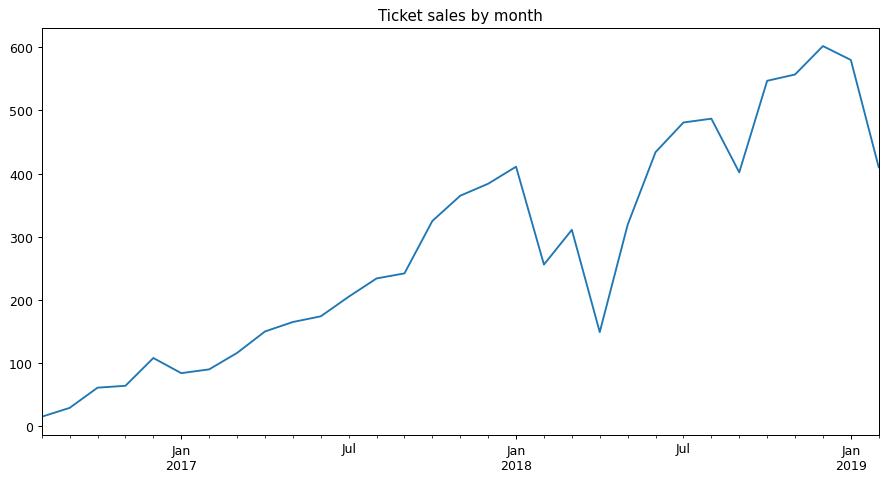

In [117]:
plt.figure(figsize=(12,6),dpi=90)
data['month_year'].value_counts(). sort_index().plot(kind='line')
plt.title('Ticket sales by month')

### Insight: There was a siginificant decline during January 2018 and May 2018, further data may needed to investage the cause of this unusual decrease

In [72]:
print(f'The data starts from {data.time.min()} and ends at {data.time.max()}')

The data starts from 2016-08-02 00:00:00 and ends at 2019-02-28 00:00:00


In [81]:
s= pd.Series(pd.date_range(data.time.min(), data.time.max(), freq='D'))
s

0     2016-08-02
1     2016-08-03
2     2016-08-04
3     2016-08-05
4     2016-08-06
         ...    
936   2019-02-24
937   2019-02-25
938   2019-02-26
939   2019-02-27
940   2019-02-28
Length: 941, dtype: datetime64[ns]

In [88]:
data['weekday']=data['time'].dt.day_name()
data['weekday']

0        Thursday
1        Thursday
2        Thursday
3        Thursday
4        Thursday
          ...    
8752     Saturday
8753       Friday
8754       Friday
8755    Wednesday
8756      Tuesday
Name: weekday, Length: 8757, dtype: object

In [104]:
data.groupby('weekday')['author'].count().sort_values()

weekday
Friday       1025
Saturday     1108
Thursday     1149
Wednesday    1228
Sunday       1368
Tuesday      1395
Monday       1484
Name: author, dtype: int64

<AxesSubplot:xlabel='weekday'>

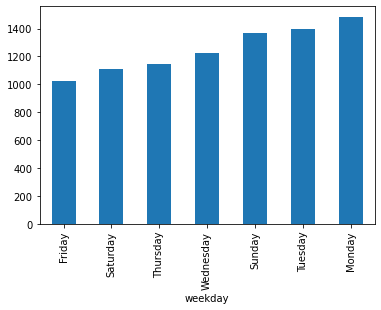

In [106]:
data.groupby('weekday')['author'].count().sort_values().plot(kind='bar')

### Insight: The above bar graph shows that Kuloo users are more likely to order their ticket on Maday, Tuesday and Sunday.

## 4. Repeat Customers analysis

In [123]:
df_frequency_2=data.groupby('author').count().reset_index()
df_frequency_2[df_frequency_2['frequency']>=2].groupby('author')['frequency'].sum().sort_values()

author
Kit Ying     2
Meredith     2
Melvin       2
Melanie      2
Mei Ting     2
            ..
David        8
Michael     11
Karen       13
Jennifer    15
Michelle    18
Name: frequency, Length: 603, dtype: int64

In [127]:
df_frequency_2[df_frequency_2['frequency']>=2].groupby('author')['frequency'].sum().value_counts()

2     402
3      99
4      49
5      25
6      13
7       7
8       4
15      1
13      1
11      1
18      1
Name: frequency, dtype: int64

In [149]:
df2=pd.DataFrame(df_frequency_2[df_frequency_2['frequency']>=2].groupby('author')['frequency'].sum().value_counts())
df2['percentage']=round(df2['frequency']/df2['frequency'].sum(),4)
df2

,frequency,percentage
2,402,0.6667
3,99,0.1642
4,49,0.0813
5,25,0.0415
6,13,0.0216
7,7,0.0116
8,4,0.0066
15,1,0.0017
13,1,0.0017
11,1,0.0017


In [ ]:
df2['percentage']=df2['visitor count']/df2['visitor count'].sum()

<AxesSubplot:ylabel='Frequency'>

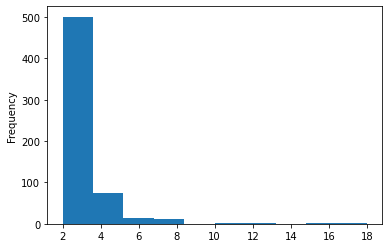

In [124]:
df_frequency_2[df_frequency_2['frequency']>=2].groupby('author')['frequency'].sum().plot.hist()

###  A big fan visited the attraction 18 times during the 3 years. However, 66.67% of repeat customers visited the attraction twice. Most repeat visitors 83% purchased 2-3 tickets through Klook website

In [150]:
df_frequency_2[df_frequency_2['frequency']>=2].groupby('author')['frequency'].sum().sort_values().describe()

count    603.000000
mean       2.716418
std        1.505531
min        2.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       18.000000
Name: frequency, dtype: float64

<AxesSubplot:>

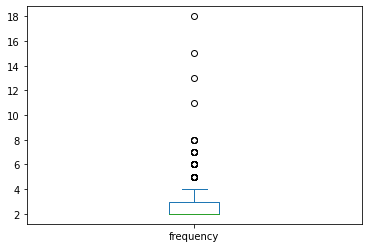

In [152]:
df_frequency_2[df_frequency_2['frequency']>=2].groupby('author')['frequency'].sum().sort_values().plot(kind='box')

In [163]:
pivot_count=data.pivot_table(index='author',columns='month_year',values='frequency',aggfunc='count').fillna(0)
pivot_count


month_year,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,...,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02
author,,,,,,,,,,,,,,,,,,,,,
wenbiao,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Goh Yu Wen Eunice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hui Shan,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Huihui,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KO-CHENG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
芊羽,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
華山,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
蘇,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [164]:
# define frequency>1 as repeat customers, recode=1
# define frequency=1 as one time customers, recode=0
# define frequency=0 as non-customers, recode= NaN

# apply uses for dataframe(single column or row), map uses for series.
pivot_count=pivot_count.applymap(lambda x: 1 if x>1 else np.NAN if x==0 else 0)
pivot_count

month_year,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,...,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02
author,,,,,,,,,,,,,,,,,,,,,
wenbiao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
Goh Yu Wen Eunice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hui Shan,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Huihui,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KO-CHENG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
芊羽,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
華山,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
蘇,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [173]:
round(pivot_count.sum()/pivot_count.count()*100,2).sort_values()

month_year
2016-08    0.00
2016-10    0.00
2016-11    0.00
2017-01    0.00
2017-03    0.00
2017-08    0.43
2017-07    0.49
2018-03    0.65
2018-04    0.68
2018-10    0.74
2018-02    0.79
2017-12    0.79
2016-12    0.93
2019-02    0.99
2018-07    1.05
2017-11    1.11
2017-02    1.12
2018-06    1.17
2017-06    1.18
2017-10    1.25
2018-11    1.27
2018-08    1.46
2018-01    1.49
2018-05    1.59
2017-09    1.69
2019-01    1.76
2017-05    1.85
2017-04    2.04
2018-12    2.04
2018-09    2.29
2016-09    7.41
Freq: M, dtype: float64

In [174]:
round(pivot_count.sum()/pivot_count.count()*100,2).describe()

count    31.000000
mean      1.234194
std       1.316404
min       0.000000
25%       0.665000
50%       1.110000
75%       1.540000
max       7.410000
dtype: float64

Text(0.5, 1.0, 'Repeat Cumstomer Rate by Month 2016-2019')

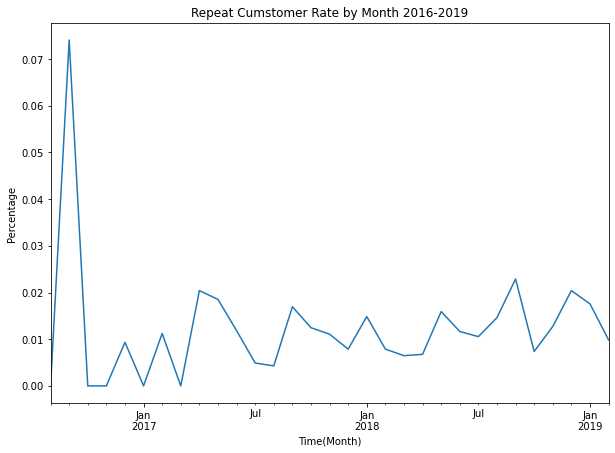

In [170]:
plt.figure(figsize=(10,7))
(pivot_count.sum()/pivot_count.count()).plot()
plt.xlabel('Time(Month)')
plt.ylabel('Percentage')
plt.title('Repeat Cumstomer Rate by Month 2016-2019')

## In September 2019, repeat cumstomer rate(ECR) reached the peak, at 7.41. The figure dropped significatelly afterward. Even though ECR experienced fluctuation, it remains in the interval [1%,2%]. The mean was 1.23%

Text(0.5, 1.0, 'Repeat Customers count 2016-2019')

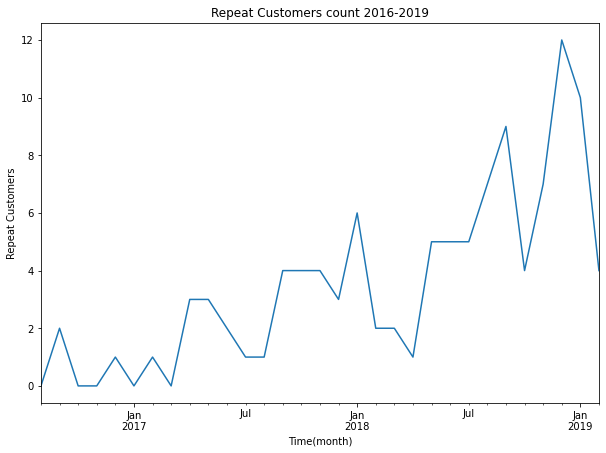

In [179]:
plt.figure(figsize=(10,7))
pivot_count.sum().plot()
plt.xlabel('Time(month)')
plt.ylabel('Repeat Customers')
plt.title('Repeat Customers count 2016-2019')

In [187]:
pivot_count.sum().values

array([ 0.,  2.,  0.,  0.,  1.,  0.,  1.,  0.,  3.,  3.,  2.,  1.,  1.,
        4.,  4.,  4.,  3.,  6.,  2.,  2.,  1.,  5.,  5.,  5.,  7.,  9.,
        4.,  7., 12., 10.,  4.])

### Overall, the number of repeat cumstomers keep increasing from 2016 to 2019. However, during Juanuary 2018 and May 2018,  further data will be needed from related department to investigate the reason of this decline

In [212]:
pivot_purchase=data.pivot_table(index='author',
                columns='month_year',
                values='frequency',
                aggfunc='count').fillna(0)
pivot_purchase

month_year,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,...,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02
author,,,,,,,,,,,,,,,,,,,,,
wenbiao,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Goh Yu Wen Eunice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hui Shan,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Huihui,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KO-CHENG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
芊羽,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
華山,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
蘇,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [210]:
data.month_year.nunique()

31

In [213]:
len(pivot_purchase.columns)

31

In [218]:
def purchase_return(table):
    status=[]
    for i in range(data.month_year.nunique()-1):
        if table[i]==1: #customer had purchasing history in a specific month
            if table[i+1]==1:#  customer ordered tickets in the consecutive month, we define he/she as a loyal customer
                status.append(1)
            else:
                status.append(0)
        else:
            status.append(np.NaN)
    status.append(np.NaN)
    return pd.Series(status,pivot_purchase.columns)
        
    

pivot_purchase_return=pivot_purchase.apply(purchase_return,axis=1)
pivot_purchase_return

month_year,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,...,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02
author,,,,,,,,,,,,,,,,,,,,,
wenbiao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
Goh Yu Wen Eunice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hui Shan,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Huihui,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KO-CHENG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
芊羽,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
華山,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
蘇,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [219]:
pivot_purchase_return.sum()

month_year
2016-08     0.0
2016-09     0.0
2016-10     0.0
2016-11     0.0
2016-12     2.0
2017-01     1.0
2017-02     1.0
2017-03     2.0
2017-04     2.0
2017-05     2.0
2017-06     0.0
2017-07     3.0
2017-08     2.0
2017-09     3.0
2017-10     3.0
2017-11     6.0
2017-12     4.0
2018-01     2.0
2018-02     4.0
2018-03     3.0
2018-04     2.0
2018-05    12.0
2018-06    14.0
2018-07    11.0
2018-08     6.0
2018-09    10.0
2018-10    12.0
2018-11    17.0
2018-12     8.0
2019-01     8.0
2019-02     0.0
Freq: M, dtype: float64

Text(0.5, 1.0, 'Loyal customer rate month by month 2016-2019')

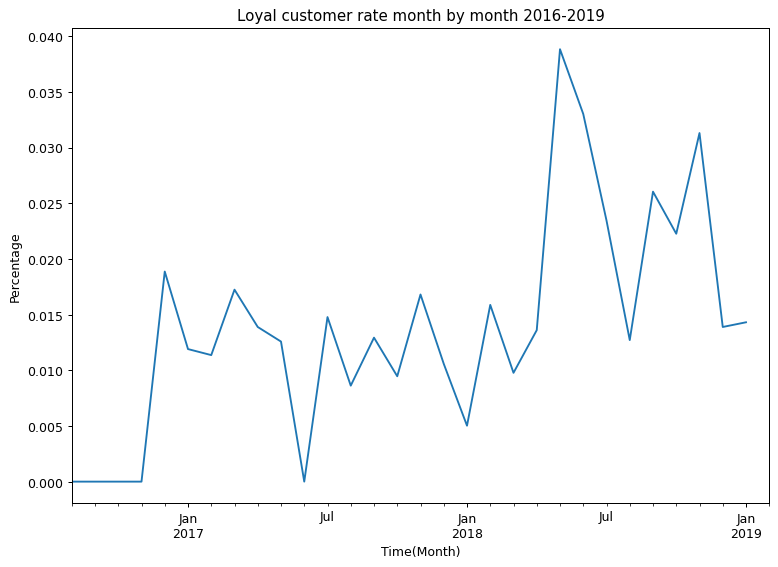

In [226]:
plt.figure(figsize=(10,7),dpi=90)
(pivot_purchase_return.sum()/pivot_purchase_return.count()).plot()
plt.xlabel('Time(Month)')
plt.ylabel('Percentage')
plt.title('Loyal customer rate month by month 2016-2019')

### Loyal customer rate exprienced flucuation during the given years. June 2018 logged the highest loyal customer rate

Text(0.5, 1.0, 'Loyal customer count month by month 2016-2019')

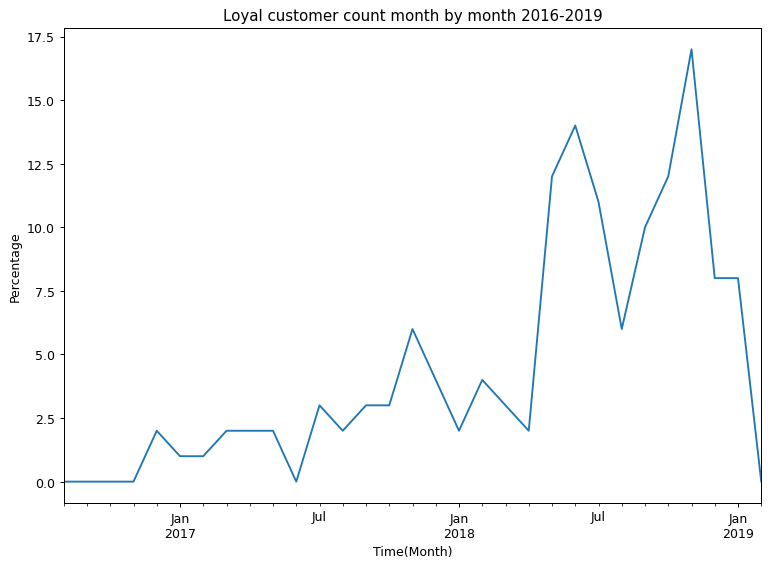

In [228]:
plt.figure(figsize=(10,7),dpi=90)
pivot_purchase_return.sum().plot()
plt.xlabel('Time(Month)')
plt.ylabel('Percentage')
plt.title('Loyal customer count month by month 2016-2019')

In [237]:
def user_active(table):
    status=[]
    for i in range(31):
        if table[i]==0:
            if len(status)==0:
                status.append('unreg')
            else:
                if status[i-1]=='unreg':
                    status.append('unreg')
                else:
                    status.append('unactive')
        else:
            if len(status)==0:
                status.append('new')
            else:
                if status[i-1]=='unactive':
                    status.append('return')
                elif status[i-1]=='unreg':
                    status.append('new')
                else:
                    status.append('active')
    return pd.Series(status,pivot_purchase.columns)
pivot_purchase_status=pivot_purchase.apply(user_active,axis=1)
pivot_purchase_status
            

month_year,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,...,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02
author,,,,,,,,,,,,,,,,,,,,,
wenbiao,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,...,unreg,unreg,unreg,unreg,unreg,unreg,unreg,new,unactive,unactive
Goh Yu Wen Eunice,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,...,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
Hui Shan,unreg,unreg,unreg,unreg,new,unactive,unactive,unactive,unactive,unactive,...,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
Huihui,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,...,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
KO-CHENG,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,...,unreg,unreg,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
芊羽,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,...,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
華山,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,...,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
蘇,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,...,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive


In [241]:
pivot_purchase_status.replace('unreg',np.NaN)

month_year,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,...,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02
author,,,,,,,,,,,,,,,,,,,,,
wenbiao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,new,unactive,unactive
Goh Yu Wen Eunice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
Hui Shan,NaN,NaN,NaN,NaN,new,unactive,unactive,unactive,unactive,unactive,...,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
Huihui,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
KO-CHENG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
芊羽,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
華山,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
蘇,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive


In [242]:
pivot_purchase_status.replace('unreg',np.NaN).apply(pd.value_counts)

month_year,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,...,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02
active,NaN,NaN,NaN,NaN,NaN,2,1,1,2,2,...,2,13,14,11,11,11,14,20,11,9
new,15.0,27.0,61.0,63.0,106.0,81,85,112,142,156,...,266,382,407,420,330,464,461,503,490,352
return,NaN,NaN,NaN,1.0,1.0,1,3,3,3,4,...,46,34,53,48,52,68,75,65,68,45
unactive,NaN,15.0,42.0,102.0,165.0,269,349,434,545,686,...,3599,3866,4228,4643,5059,5373,5827,6292,6801,7316


<AxesSubplot:xlabel='month_year'>

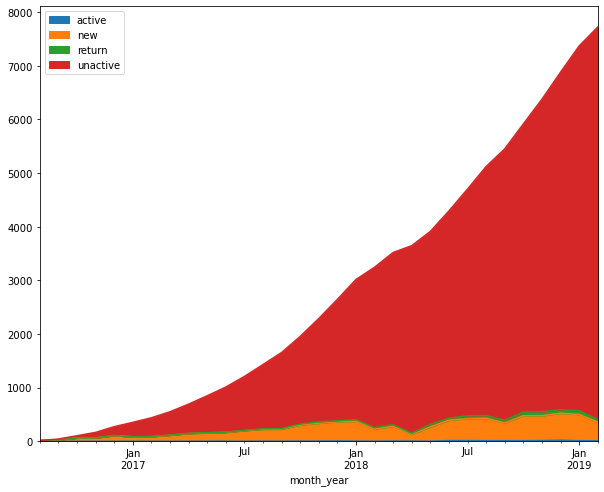

In [252]:
pivot_purchase_status_count=pivot_purchase_status.replace('unreg',np.NaN).apply(pd.value_counts)
pivot_purchase_status_count.T.plot(kind='area',figsize=(10,8))

## Insight: unactive users occupied the highest proportion. New users see a gradual increase. Return users remain relatively small

## 5.Month to month user categories

In [255]:
return_rate=pivot_purchase_status_count.apply(lambda x:x/x.sum())
return_rate

month_year,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,...,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02
active,NaN,NaN,NaN,NaN,NaN,0.005666,0.002283,0.001818,0.002890,0.002358,...,0.000511,0.003027,0.002977,0.002148,0.002018,0.001859,0.002195,0.002907,0.001493,0.001166
new,1.0,0.642857,0.592233,0.379518,0.389706,0.229462,0.194064,0.203636,0.205202,0.183962,...,0.067979,0.088941,0.086559,0.081999,0.060528,0.078431,0.072291,0.073110,0.066486,0.045584
return,NaN,NaN,NaN,0.006024,0.003676,0.002833,0.006849,0.005455,0.004335,0.004717,...,0.011756,0.007916,0.011272,0.009371,0.009538,0.011494,0.011761,0.009448,0.009227,0.005828
unactive,NaN,0.357143,0.407767,0.614458,0.606618,0.762040,0.796804,0.789091,0.787572,0.808962,...,0.919755,0.900116,0.899192,0.906482,0.927916,0.908215,0.913753,0.914535,0.922795,0.947423


Text(0.5, 1.0, 'User categories pct month by month 2016-2019')

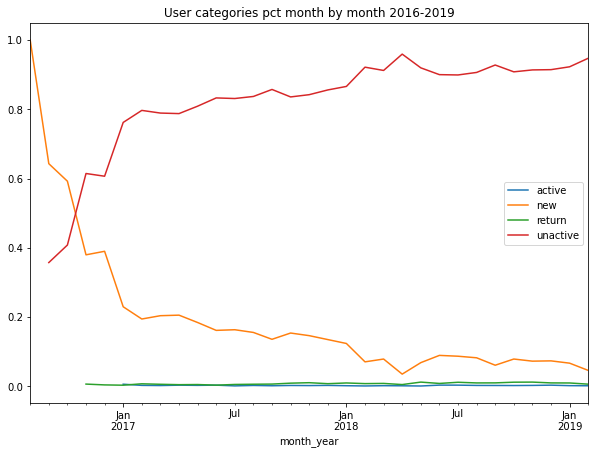

In [259]:

return_rate.T.plot(figsize=(10,7))
plt.title('User categories pct month by month 2016-2019')

## Insight: the percentage of new users gradually decrease during the period. Unactive users accumulatively increase. Return user group and active user group were stable but relatively small

## 6. Month to Month Active Users

In [262]:
round(return_rate.T['active']*100,2)

month_year
2016-08     NaN
2016-09     NaN
2016-10     NaN
2016-11     NaN
2016-12     NaN
2017-01    0.57
2017-02    0.23
2017-03    0.18
2017-04    0.29
2017-05    0.24
2017-06    0.30
2017-07    0.08
2017-08    0.21
2017-09    0.12
2017-10    0.20
2017-11    0.17
2017-12    0.23
2018-01    0.13
2018-02    0.06
2018-03    0.14
2018-04    0.11
2018-05    0.05
2018-06    0.30
2018-07    0.30
2018-08    0.21
2018-09    0.20
2018-10    0.19
2018-11    0.22
2018-12    0.29
2019-01    0.15
2019-02    0.12
Freq: M, Name: active, dtype: float64

Text(0.5, 1.0, 'Monthly Active User Percentage')

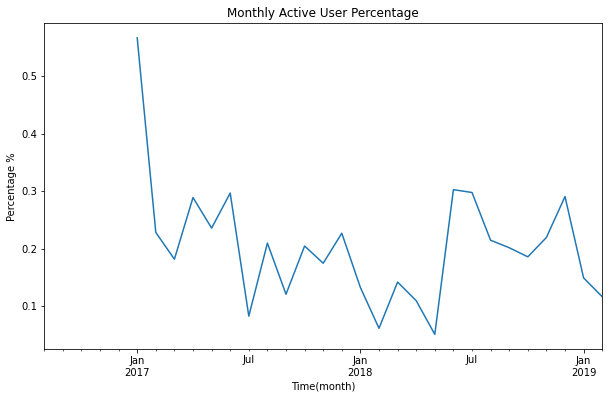

In [267]:
(return_rate.T['active']*100).plot(figsize=(10,6))
plt.xlabel('Time(month)')
plt.ylabel('Percentage %')
plt.title('Monthly Active User Percentage')

## Insight: Feburary shows decreasing trend throughout the period. More details need more data support

## 7. Return users analysis

Text(0.5, 1.0, 'Monthly Return User Percentage')

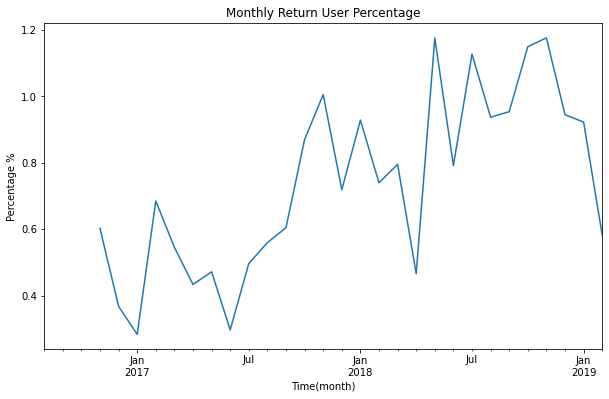

In [268]:
(return_rate.T['return']*100).plot(figsize=(10,6))
plt.xlabel('Time(month)')
plt.ylabel('Percentage %')
plt.title('Monthly Return User Percentage')

### Insight: Overall, the percentage of return users shows an upward trend, even though it exprienced fluctuation.

In [282]:
print(f"The average percentaeg of retun users rate is {round(return_rate.T['return'].mean()*100,2)}%")

The average percentaeg of retun users rate is 0.74%


In [278]:
return_rate.T['return'].mean()

0.00736823576229978

## 8. User lifespan analysis

In [284]:
user_reg=data.groupby('author')['time'].min()
user_reg

author
      wenbiao        2018-12-31
 Goh Yu Wen Eunice   2017-11-26
 Hui Shan            2016-12-07
 Huihui              2017-09-28
 KO-CHENG            2018-07-16
                        ...    
芊羽                   2018-03-11
華山                   2017-08-14
蘇                    2017-12-10
郁君                   2017-12-25
青慧                   2018-02-28
Name: time, Length: 7722, dtype: datetime64[ns]

In [286]:
user_left=data.groupby('author')['time'].max()
user_left

author
      wenbiao        2018-12-31
 Goh Yu Wen Eunice   2017-11-26
 Hui Shan            2016-12-07
 Huihui              2017-09-28
 KO-CHENG            2018-07-16
                        ...    
芊羽                   2018-03-11
華山                   2017-08-14
蘇                    2017-12-10
郁君                   2017-12-25
青慧                   2018-02-28
Name: time, Length: 7722, dtype: datetime64[ns]

In [298]:
user_lifespan=(user_left-user_reg).reset_index()
user_lifespan['lifespan']=user_lifespan['time']/np.timedelta64(1,'D')
user_lifespan

,author,time,lifespan
0,wenbiao,0 days,0.0
1,Goh Yu Wen Eunice,0 days,0.0
2,Hui Shan,0 days,0.0
3,Huihui,0 days,0.0
4,KO-CHENG,0 days,0.0
...,...,...,...
7717,芊羽,0 days,0.0
7718,華山,0 days,0.0
7719,蘇,0 days,0.0
7720,郁君,0 days,0.0


In [296]:
user_lifespan.describe()

,time
count,7722
mean,23 days 01:45:32.867132867
std,98 days 16:47:46.849668504
min,0 days 00:00:00
25%,0 days 00:00:00
50%,0 days 00:00:00
75%,0 days 00:00:00
max,864 days 00:00:00


Text(0.5, 1.0, 'User lifespan Histogram')

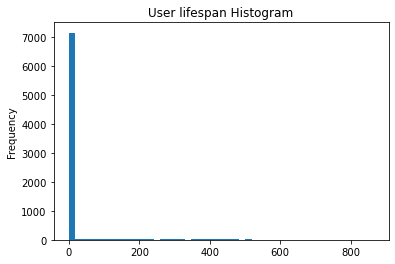

In [301]:
user_lifespan['lifespan'].plot.hist(bins=50)
plt.title('User lifespan Histogram')

In [302]:
user_lifespan[user_lifespan['lifespan']==0]

,author,time,lifespan
0,wenbiao,0 days,0.0
1,Goh Yu Wen Eunice,0 days,0.0
2,Hui Shan,0 days,0.0
3,Huihui,0 days,0.0
4,KO-CHENG,0 days,0.0
...,...,...,...
7717,芊羽,0 days,0.0
7718,華山,0 days,0.0
7719,蘇,0 days,0.0
7720,郁君,0 days,0.0


In [304]:
user_lifespan[user_lifespan['lifespan']==0].shape[0]

7130

In [312]:
print(f"There are {user_lifespan.shape[0]} unique users, however, the number of those customers with lifespan more than 0 day is {user_lifespan[user_lifespan['lifespan']==0].shape[0]}, account for {round(user_lifespan[user_lifespan['lifespan']==0].shape[0]/user_lifespan.shape[0]*100,2)}%")

There are 7722 unique users, however, the number of those customers with lifespan more than 0 day is 7130, account for 92.33%


In [313]:
user_lifespan[user_lifespan['lifespan']>0]

,author,time,lifespan
49,ANGELINA,226 days,226.0
74,ARLENE,146 days,146.0
83,Aaron,655 days,655.0
90,Abigail,430 days,430.0
93,Ace,152 days,152.0
...,...,...,...
7615,yanyan,113 days,113.0
7626,yewon,28 days,28.0
7646,yinung,28 days,28.0
7660,yu,2 days,2.0


Text(0.5, 1.0, 'Users with more than 1 day lifespan histogram')

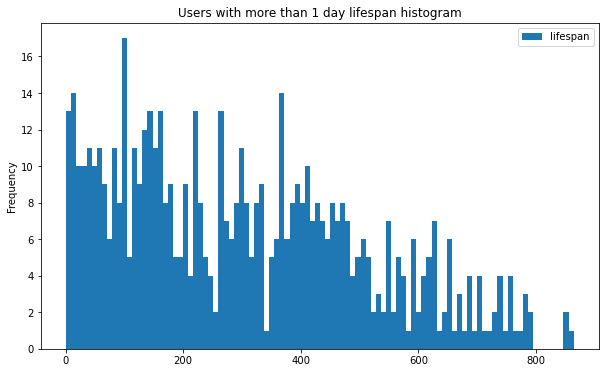

In [317]:

user_lifespan[user_lifespan['lifespan']>0].plot.hist(bins=100,figsize=(10,6))
plt.title('Users with more than 1 day lifespan histogram')

In [318]:
user_lifespan[user_lifespan['lifespan']>0].describe()

,time,lifespan
count,592,592.000000
mean,300 days 23:11:21.081081080,300.966216
std,208 days 13:01:27.601004600,208.542681
min,1 days 00:00:00,1.000000
25%,123 days 12:00:00,123.500000
50%,278 days 12:00:00,278.500000
75%,448 days 06:00:00,448.250000
max,864 days 00:00:00,864.000000


### Insight: Exclude 0 day customers, the average lifespan of users is 300 days

## 9. Retention rate analysis

In [324]:
user_purchase_retention=pd.merge(left=data,right=user_reg.reset_index(),how='inner',on='author',suffixes=('','_min'))
user_purchase_retention['time_diff']=user_purchase_rentation['time']-user_purchase_rentation['time_min']
user_purchase_retention

,author,rating,time,year,amount,frequency,month_year,weekday,time_min,time_diff
0,YOUNG,60,2019-02-28,2019,110,1,2019-02,Thursday,2019-02-28,0 days
1,SHING YAN,100,2019-02-28,2019,110,1,2019-02,Thursday,2019-02-28,0 days
2,Sha,60,2019-02-28,2019,110,1,2019-02,Thursday,2019-02-28,0 days
3,Mary Mae,100,2019-02-28,2019,110,1,2019-02,Thursday,2019-02-28,0 days
4,Maria Cristina,100,2019-02-28,2019,110,1,2019-02,Thursday,2017-06-27,611 days
...,...,...,...,...,...,...,...,...,...,...
8752,CHI NANG,100,2016-08-07,2016,110,1,2016-08,Sunday,2016-08-07,0 days
8753,Oliver Stephen Ah Kam,100,2016-08-05,2016,110,1,2016-08,Friday,2016-08-05,0 days
8754,Halley,100,2016-08-05,2016,110,1,2016-08,Friday,2016-08-05,0 days
8755,ANDREW WEIQIANG,100,2016-08-03,2016,110,1,2016-08,Wednesday,2016-08-03,0 days


In [326]:
user_purchase_retention['time_diff']=user_purchase_retention['time_diff'].apply(lambda x:x/np.timedelta64(1,'D'))
user_purchase_retention['time_diff']

0         0.0
1         0.0
2         0.0
3         0.0
4       611.0
        ...  
8752      0.0
8753      0.0
8754      0.0
8755      0.0
8756      0.0
Name: time_diff, Length: 8757, dtype: float64

In [331]:
bin=np.arange(0,990,90)
bin

array([  0,  90, 180, 270, 360, 450, 540, 630, 720, 810, 900])

In [332]:
user_purchase_retention['time_diff_bin']=pd.cut(user_purchase_retention['time_diff'],bin)
user_purchase_retention['time_diff_bin']

0                  NaN
1                  NaN
2                  NaN
3                  NaN
4       (540.0, 630.0]
             ...      
8752               NaN
8753               NaN
8754               NaN
8755               NaN
8756               NaN
Name: time_diff_bin, Length: 8757, dtype: category
Categories (10, interval[int64, right]): [(0, 90] < (90, 180] < (180, 270] < (270, 360] ... (540, 630] < (630, 720] < (720, 810] < (810, 900]]

In [337]:
pivot_retention=user_purchase_retention.groupby(['author','time_diff_bin'])['frequency'].sum().unstack()
pivot_retention

time_diff_bin,"(0, 90]","(90, 180]","(180, 270]","(270, 360]","(360, 450]","(450, 540]","(540, 630]","(630, 720]","(720, 810]","(810, 900]"
author,,,,,,,,,,
wenbiao,0,0,0,0,0,0,0,0,0,0
Goh Yu Wen Eunice,0,0,0,0,0,0,0,0,0,0
Hui Shan,0,0,0,0,0,0,0,0,0,0
Huihui,0,0,0,0,0,0,0,0,0,0
KO-CHENG,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
芊羽,0,0,0,0,0,0,0,0,0,0
華山,0,0,0,0,0,0,0,0,0,0
蘇,0,0,0,0,0,0,0,0,0,0


In [339]:
pivot_retention.sum()/pivot_retention.count()*100

time_diff_bin
(0, 90]       2.577053
(90, 180]     2.253302
(180, 270]    1.838902
(270, 360]    1.709402
(360, 450]    1.644652
(450, 540]    1.178451
(540, 630]    0.906501
(630, 720]    0.673401
(720, 810]    0.362600
(810, 900]    0.064750
dtype: float64

Text(0.5, 0, 'Time interval')

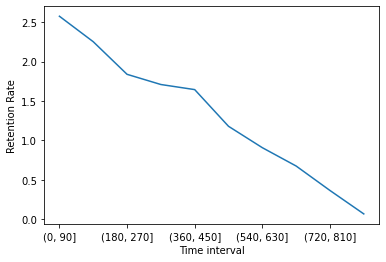

In [342]:
(pivot_retention.sum()/pivot_retention.count()*100).plot()
plt.ylabel('Retention Rate')
plt.xlabel('Time interval')

Text(0.5, 0, 'Time interval')

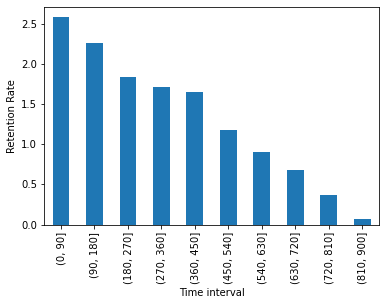

In [343]:
(pivot_retention.sum()/pivot_retention.count()*100).plot.bar()
plt.ylabel('Retention Rate')
plt.xlabel('Time interval')

## Insight: customer retention rate has a linear regression relation with user lifespan. The longest lifespan has the lowest retention rate.